In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import src.read_pic as rp
import os

# Fields to read.
fields_to_read={"B":True,"B_ext":True,"divB":True,"E":True,"E_ext":True,"rho":True,"J":True,
                "P":True,"PI":True,"gyro_radius":True, "Heat_flux":True,"N":True,"Qrem":True, "EF":True}
# Path of the folder containing the .h5 files to read.
files_path="/lustre1/project/stg_00032/share_dir/nn/data/raw_data/" # "/users/cpa/francesc/share_dir/SW/data_small/" #"/users/cpa/francesc/share_dir/jincai/dat_FF2D07e/" #="/users/cpa/francesc/share_dir/nn/data/raw_data/"
# this folder should contain a list of experiments, each of them containing the .h5 files
experiments = [f.name for f in os.scandir(files_path) if f.is_dir()]
print(f"{experiments = }")
# Below we choose only initial time step just to view spatial distribution of the fields
choose_times = [0] # if list specific timeshots are chosen, i.e. [0, 1, 5], otherwise choose_times = None
#choose_species = ['e1',None,'e2',None] # the ones which have directive None will be ignored, the ones which have same name will be summed over


experiments = ['high_res_2', 'high_res_bg0', 'high_res_bg3', 'high_res_hbg']


In [2]:
data, X, Y, qom = rp.get_experiments(experiments, files_path, fields_to_read, 
                                     choose_species=['e',None,'e',None], 
                                     choose_times=None, #[0],
                                     choose_x=[0,384], 
                                     choose_y=[217,295], #[179,333], 
                                     verbose=False)
data['high_res_2']['Bx'].shape

(384, 78, 10)

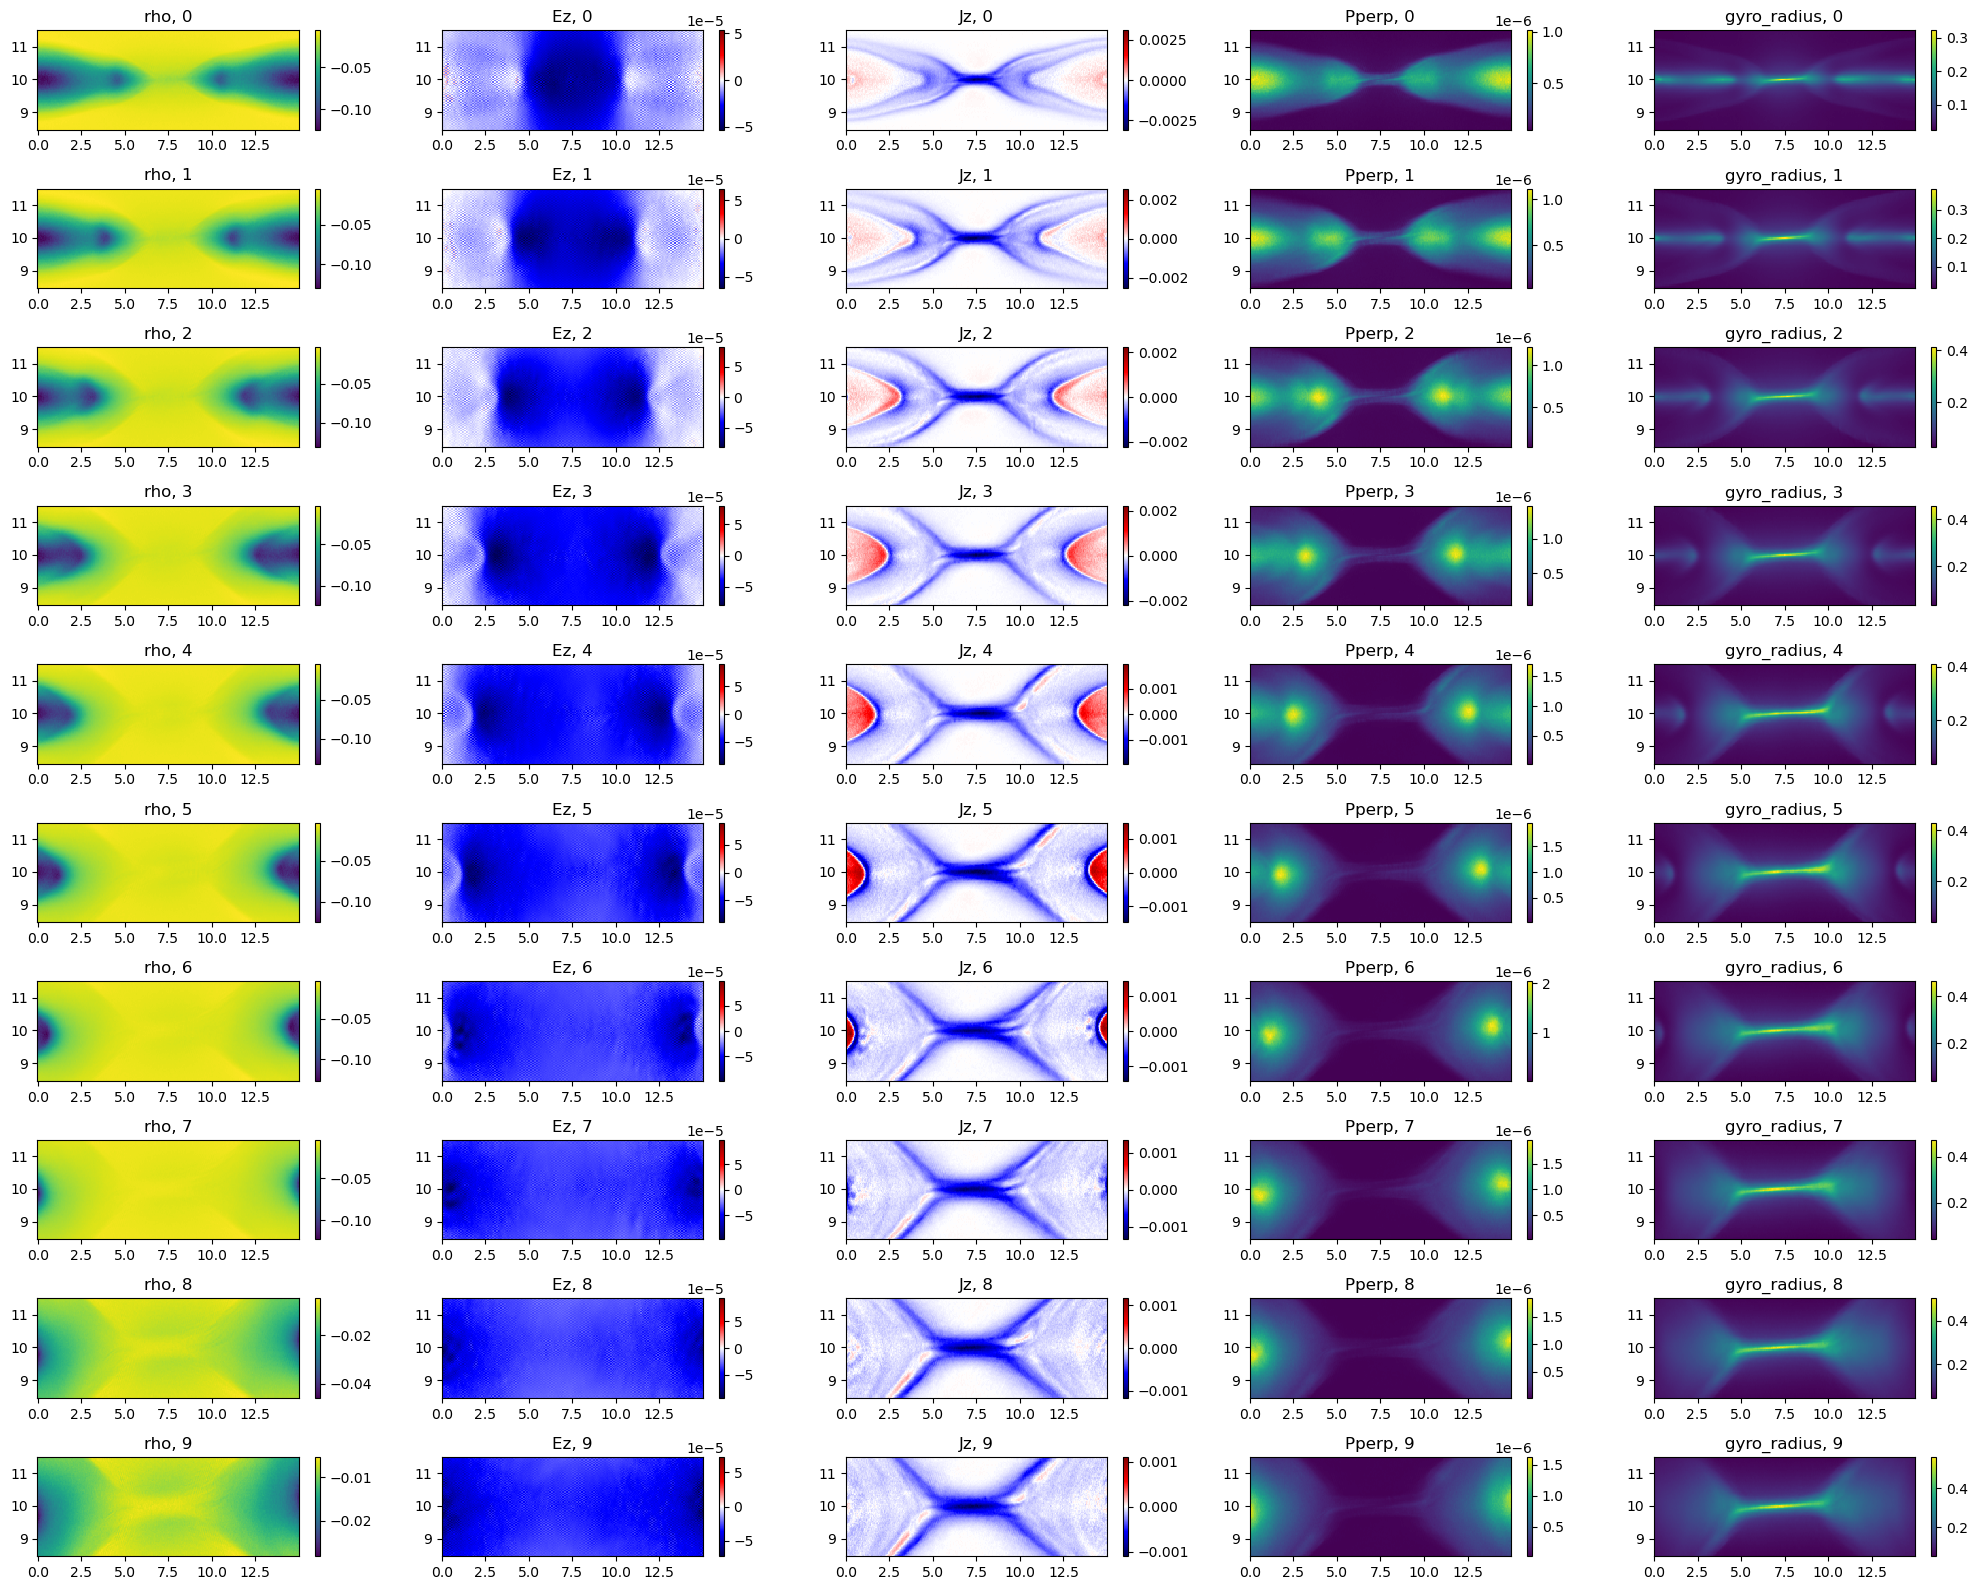

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 5, figsize=(20, 16))
experiment = 'high_res_2'
for i in range(10):
    for j, field in enumerate(['rho', 'Ez', 'Jz', 'Pperp', 'gyro_radius']):
        cmap = 'seismic' if field == 'Ez' or field == 'Jz' else 'viridis'
        vmin, vmax = None, None
        if field == 'Jz':
            vmax = max([data[experiment][field]['e'][...,i].max(), -data[experiment][field]['e'][...,i].min()])
            vmin = -vmax
        if field == 'Ez':
            vmax = max([data[experiment][field][...,i].max(), -data[experiment][field][...,i].min()])
            vmin = -vmax
            im = axes[i,j].pcolormesh(X, Y, data[experiment]['Ez'][...,i],cmap=cmap,vmax=vmax,vmin=vmin)
        else:
            im = axes[i,j].pcolormesh(X, Y, data[experiment][field]['e'][...,i], cmap=cmap, vmax=vmax, vmin=vmin)
        axes[i,j].set_title(f"{field}, {i}")
        fig.colorbar(im,ax=axes[i,j])
plt.tight_layout()
plt.show()


In [4]:
data, X, Y, qom = rp.get_experiments(experiments, files_path, fields_to_read, 
                                     choose_species=['e',None,'e',None], 
                                     choose_times=None, #[0],
                                     choose_x=[384,768], 
                                     choose_y=[700,850], #[179,333], 
                                     verbose=False)
data['high_res_2']['Bx'].shape

(384, 150, 10)

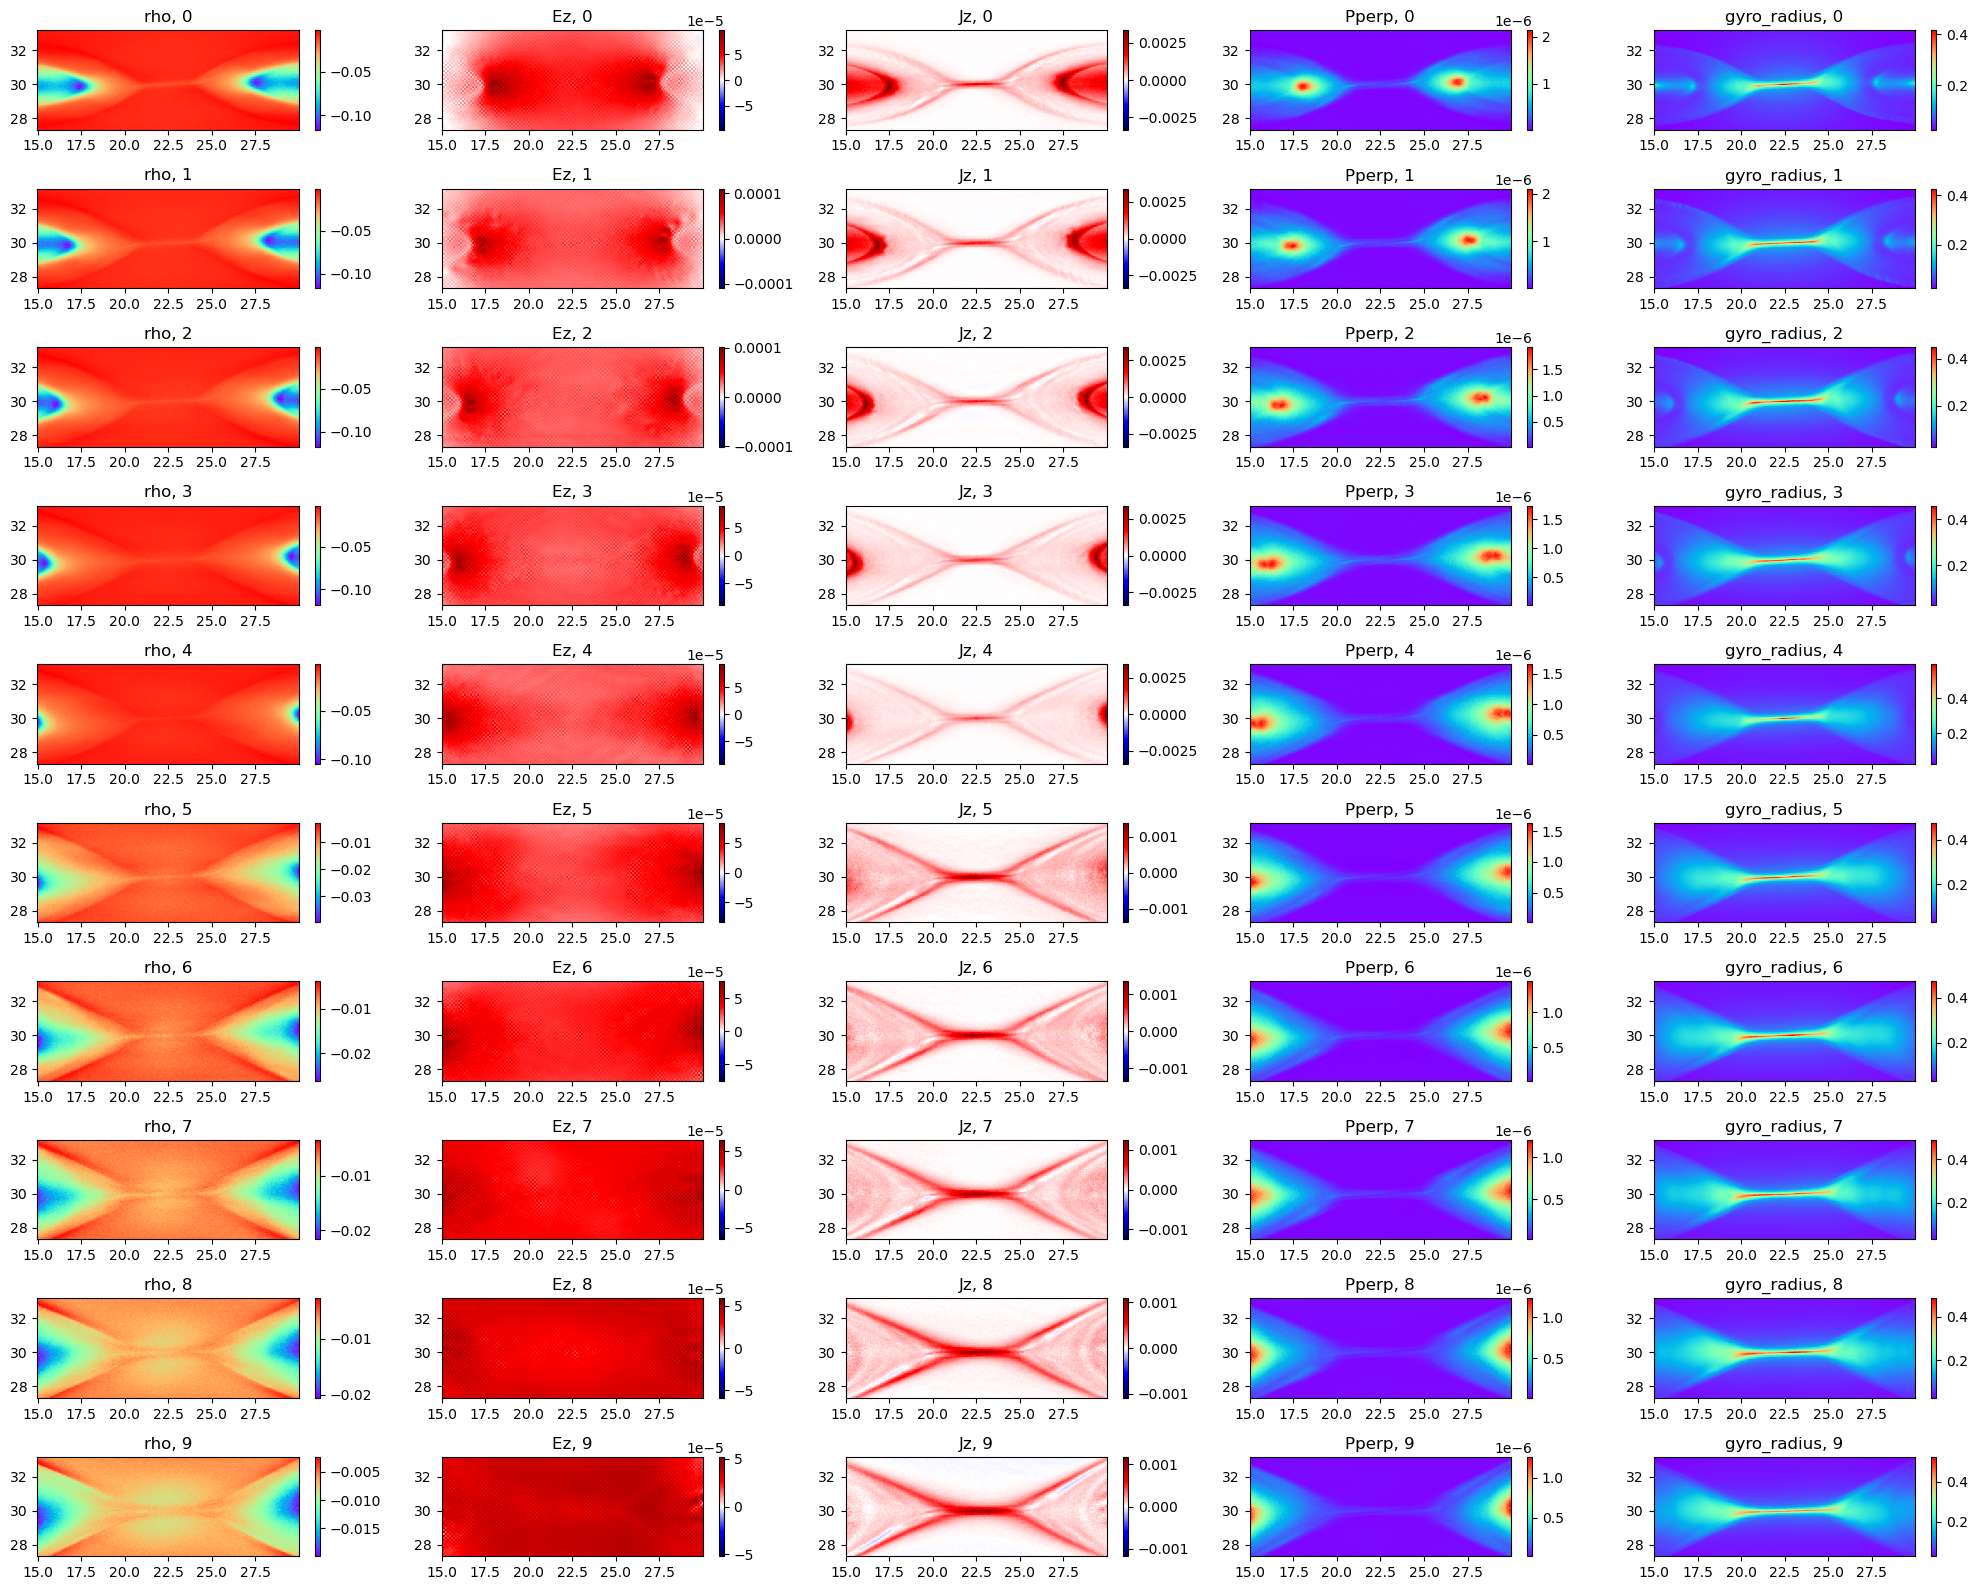

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 5, figsize=(20, 16))
experiment = 'high_res_2'
for i in range(10):
    for j, field in enumerate(['rho', 'Ez', 'Jz', 'Pperp', 'gyro_radius']):
        cmap = 'seismic' if field == 'Ez' or field == 'Jz' else 'rainbow'
        vmin, vmax = None, None
        if field == 'Jz':
            vmax = max([data[experiment][field]['e'][...,i].max(), -data[experiment][field]['e'][...,i].min()])
            vmin = -vmax
        if field == 'Ez':
            vmax = max([data[experiment][field][...,i].max(), -data[experiment][field][...,i].min()])
            vmin = -vmax
            im = axes[i,j].pcolormesh(X, Y, data[experiment]['Ez'][...,i],cmap=cmap,vmax=vmax,vmin=vmin)
        else:
            im = axes[i,j].pcolormesh(X, Y, data[experiment][field]['e'][...,i], cmap=cmap, vmax=vmax, vmin=vmin)
        axes[i,j].set_title(f"{field}, {i}")
        fig.colorbar(im,ax=axes[i,j])
plt.tight_layout()
plt.show()
